In [ ]:
9from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## OUTLIER DETECTION ON PLAYERS

IMPORT NECESSARY LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA

FUNCTION TO LOAD THE DATASET

In [ ]:
def load_data(file_name, delimiter=','):
  return pd.read_csv(file_name, delimiter=delimiter)

FUNCTION TO CALCULATE EFFICIENCY RATING

In [ ]:
def calculate_eff_rating(data):
  EFF_Rating = (data['Points'] + data['Rebounds'] + data['Assists']) / data['Games Played']
  return EFF_Rating

FUNCTION TO DISPLAY A SAMPLE OF THE OUTLIERS

In [ ]:
def display_outliers(dataset):
  outliers = dataset[dataset['Outlier'] == 0]
  total_players = len(dataset)
  total_outliers = len(outliers)

  print(f"Total Players: {total_players}")
  print(f"Total Outstanding Players (Outliers): {total_outliers}")
  print("\nSample of Outstanding Players (Outliers - First 5 and Last 5 Values):\n")

  # Show first 5 and last 5 outliers
  if total_outliers > 0:
    with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', 1000, 'display.colheader_justify', 'center'):
      print(pd.concat([outliers.head(5), outliers.tail(5)]).to_string(index=False))
  else:
    print("No outliers detected.")


FUNCTION TO VISUALIZE OUTLIER DETECTION RESULTS FOR UNSUPERVISED CLASSIFIER

In [ ]:
def plot_outlier_detection(dataset):
  plt.figure(figsize=(10, 6))
  plt.scatter(dataset['Minutes'], dataset['EFF Rating'], c=dataset['Outlier'], cmap='coolwarm_r', alpha=0.6)
  plt.title('Outlier Detection in Player Performance')
  plt.xlabel('Minutes')
  plt.ylabel('EFF Rating')
  plt.colorbar(label='Outlier (-1) / Inlier (1)')
  plt.axhline(0, color='grey', lw=1, ls='--')
  plt.axvline(0, color='grey', lw=1, ls='--')
  plt.show()

FUNCTION FOR OUTLIER DETECTION

In [ ]:
def find_outstanding_players(stats_file, career_totals_file, delimiter=','):
  player_stats = load_data(stats_file, delimiter)
  player_stats.columns = ['ilkid', 'Year', 'First Name', 'Last Name', 'Team', 'League', 'Games Played', 'Minutes',
                          'Points', 'Offensive Rebounds', 'Defensive Rebounds', 'Rebounds', 'Assists', 'Steals',
                          'Blocks', 'Turnovers', 'Personal Fouls', 'Field Goals Attempted', 'Field Goals Made',
                          'Free Throws Attempted', 'Free Throws Made', 'Three-Point Attempts', 'Three-Pointers Made']

  player_stats = player_stats[player_stats['Minutes'] > 0]
  player_stats = player_stats[player_stats['Games Played'] > 0]

  # Calculate EFF Rating
  player_stats['EFF Rating'] = calculate_eff_rating(player_stats)

  # Select relevant features
  features = player_stats[['EFF Rating', 'Points', 'Rebounds', 'Assists', 'Minutes']]

  # Scale the data
  scaler = StandardScaler()
  features_scaled = scaler.fit_transform(features)

  #reduce dimensionality
  pca = PCA(n_components=2)
  features_pca = pca.fit_transform(features_scaled)

  # Initialize unsupervised classifiers

  print("\n Isolation Forest")
  p1 = player_stats
  iso_forest = IsolationForest(contamination=0.05, random_state=42)
  p1['Outlier'] = iso_forest.fit_predict(features_pca)
  p1['Outlier'] = p1['Outlier'].map({-1: 0, 1: 1})
  display_outliers(p1)
  plot_outlier_detection(p1)

  print("\n One-Class SVM")
  p2 = player_stats
  svm_model = OneClassSVM(nu=0.03, kernel="rbf", gamma=0.005)
  p2['Outlier'] = svm_model.fit_predict(features_pca)
  p2['Outlier'] = p2['Outlier'].map({-1: 0, 1: 1})
  display_outliers(p2)
  plot_outlier_detection(p2)

  print("\n SGD One-Class SVM")
  p3 = player_stats
  svm_sgd = linear_model.SGDOneClassSVM(random_state=42,nu=0.1)
  p3['Outlier'] = svm_sgd.fit_predict(features_pca)
  p3['Outlier'] = p3['Outlier'].map({-1: 0, 1: 1})
  display_outliers(p3)
  plot_outlier_detection(p3)

  print("\n Local Outlier Factor")
  p4 = player_stats
  lof = LocalOutlierFactor(n_neighbors = 20, contamination = 0.05)
  p4['Outlier'] = lof.fit_predict(features_pca)
  p4['Outlier'] = p4['Outlier'].map({-1: 0, 1: 1})
  display_outliers(p4)
  plot_outlier_detection(p4)


CALL FUNCTION FOR OUTLIER DETECTION


 Isolation Forest
Total Players: 18084
Total Outstanding Players (Outliers): 905

Sample of Outstanding Players (Outliers - First 5 and Last 5 Values):

  ilkid    Year First Name Last Name Team League  Games Played  Minutes  Points  Offensive Rebounds  Defensive Rebounds  Rebounds  Assists  Steals  Blocks  Turnovers  Personal Fouls  Field Goals Attempted  Field Goals Made  Free Throws Attempted  Free Throws Made  Three-Point Attempts  Three-Pointers Made  EFF Rating  Outlier
GALLAHA01  1952    Harry    Gallatin NYK    N          70        2333      865            0                   0             916     126        0       0       0.0          224                 635                 282                 430                  301                   0                    0           27.242857     0    
JOHNSNE02  1952     Neil    Johnston PH1    N          70        3166     1564            0                   0             976     197        0       0       0.0          248               

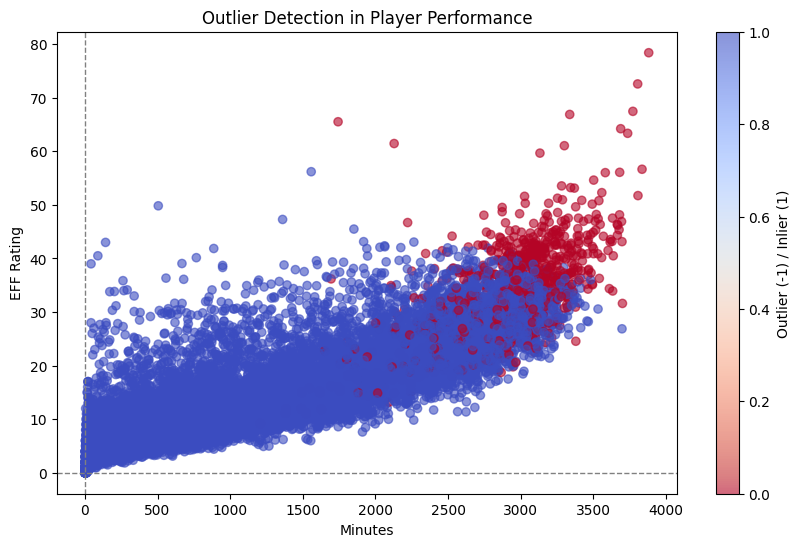


 One-Class SVM
Total Players: 18084
Total Outstanding Players (Outliers): 542

Sample of Outstanding Players (Outliers - First 5 and Last 5 Values):

  ilkid    Year First Name Last Name  Team League  Games Played  Minutes  Points  Offensive Rebounds  Defensive Rebounds  Rebounds  Assists  Steals  Blocks  Turnovers  Personal Fouls  Field Goals Attempted  Field Goals Made  Free Throws Attempted  Free Throws Made  Three-Point Attempts  Three-Pointers Made  EFF Rating  Outlier
SINICZE01  1951     Zeke     Sinicola FTW    N           3          15        2            0                   0              1        0        0      0        0.0            2                   4                   1                   2                    0                   0                    0            1.000000     0    
GREKINO01  1953     Norm       Grekin PH1    N           1           1        0            0                   0              0        0        0      0        0.0            1               

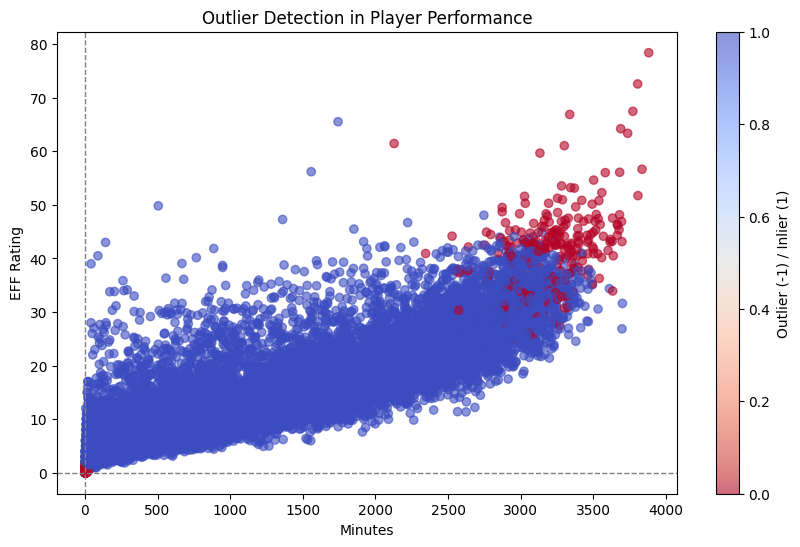


 SGD One-Class SVM
Total Players: 18084
Total Outstanding Players (Outliers): 672

Sample of Outstanding Players (Outliers - First 5 and Last 5 Values):

  ilkid    Year First Name Last Name Team League  Games Played  Minutes  Points  Offensive Rebounds  Defensive Rebounds  Rebounds  Assists  Steals  Blocks  Turnovers  Personal Fouls  Field Goals Attempted  Field Goals Made  Free Throws Attempted  Free Throws Made  Three-Point Attempts  Three-Pointers Made  EFF Rating  Outlier
COUSYBO01  1952      Bob      Cousy  BOS    N          71        2945     1407            0                   0             449     547        0       0       0.0          227                1320                 464                 587                  479                   0                    0           33.845070     0    
COUSYBO01  1953      Bob      Cousy  BOS    N          72        2857     1383            0                   0             394     518        0       0       0.0          201              

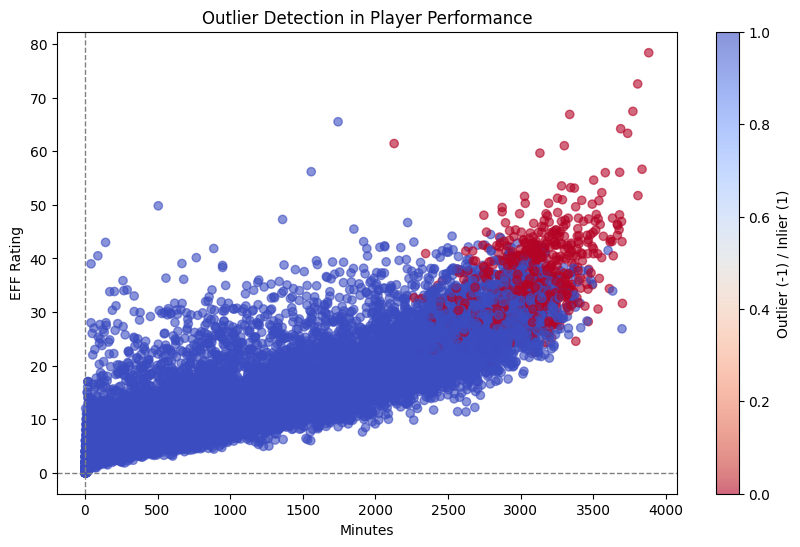


 Local Outlier Factor
Total Players: 18084
Total Outstanding Players (Outliers): 905

Sample of Outstanding Players (Outliers - First 5 and Last 5 Values):

  ilkid    Year First Name Last Name Team League  Games Played  Minutes  Points  Offensive Rebounds  Defensive Rebounds  Rebounds  Assists  Steals  Blocks  Turnovers  Personal Fouls  Field Goals Attempted  Field Goals Made  Free Throws Attempted  Free Throws Made  Three-Point Attempts  Three-Pointers Made  EFF Rating  Outlier
SINICZE01  1951    Zeke     Sinicola FTW    N           3          15        2            0                   0               1       0       0        0       0.0            2                  4                    1                   2                    0                  0                    0             1.000000     0    
KILEYJA01  1952    Jack        Kiley FTW    N           6          27        6            0                   0               2       3       0        0       0.0            7           

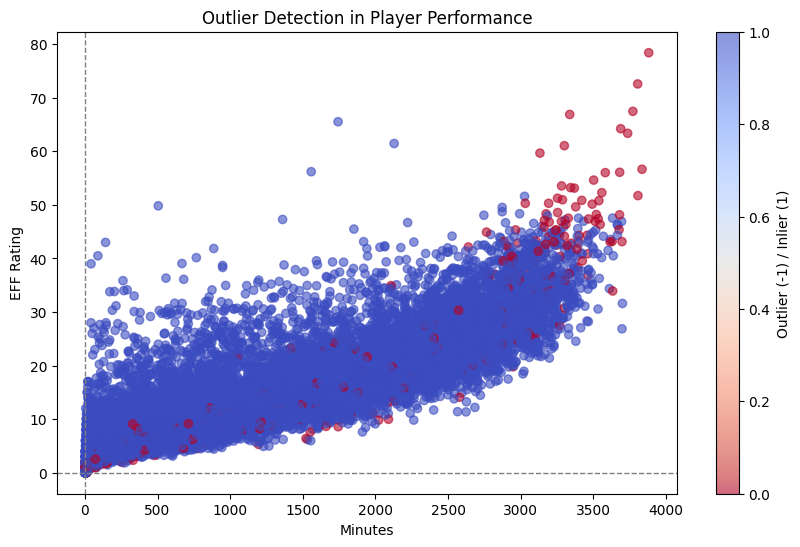

In [ ]:
find_outstanding_players('/content/player_regular_season.txt', '/content/player_regular_season_career.txt', delimiter=',')